# TMS Stimulation

In [1]:
import numpy as np
from tvb.simulator.lab import * 
from mpl_toolkits.mplot3d import Axes3D
from time import time as zeit

label_font = 16
title_font = 24
legend_font = 12

%pylab nbagg
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [5]:
from simulation import *
from tms_coil import *
from visualise import *
from stimulus import *

### Define all models

In [3]:
# TVB
neuron_model, heunint, default_cortex, white_matter, white_matter_coupling = get_brain_models()

WARNING  File 'hemispheres' not found in ZIP.


Index numbers of coil positions
0 	 Occipital
1 	 Occipital-Right
2 	 Right
3 	 Frontal-Right
4 	 Frontal
5 	 Frontal-Left
6 	 Left
7 	 Occipital-Left
8 	 Occipital-Cranial-Central
9 	 Cranial
10 	 Frontal-Cranial-Central
11 	 Frontal-Cranial-Right
12 	 Cranial-Right
13 	 Occipital-Cranial-Right
14 	 Occipital-Cranial-Left
15 	 Cranial-Left
16 	 Frontal-Cranial-Left


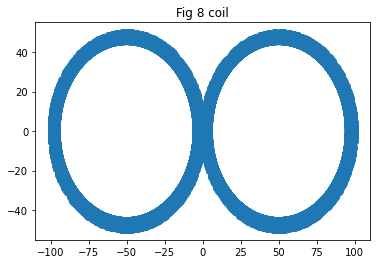

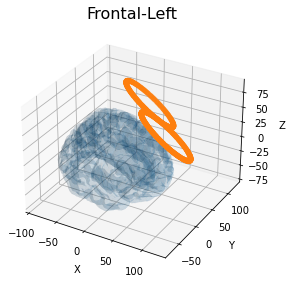

Stimulus distribution at chosen coil position: Frontal-Cranial-Left

Region index    Region label    Stimulus weighting
63              lPMCDL          0.23350613806714346
45              lFEF            0.228451942426088
55              lPFCCL          0.20781878411794066
56              lPFCDL          0.1898217691138802
50              lM1             0.15153664196230657
64              lPMCM           0.12665799092285102
65              lPMCVL          0.12160624009388328
66              lS1             0.11956446299571014
26              rPMCM           0.11164318477799874
57              lPFCDM          0.11106427013961766
18              rPFCDL          0.1096782569234601
61              lPFCVL          0.10854826509262985
41              lCCA            0.10277122926920355
25              rPMCDL          0.09784678697036187
3               rCCA            0.0965410726062197
51              lPCI            0.08980464773767678
19              rPFCDM          0.08968294164970557
6

In [6]:
# Choose TMS coil from "fig8" and "circular"
fig8_coil = TMS_coil(type="fig8")
coil, coil_pts, xs, ys = fig8_coil.get_tms_coil()
plot_coil_shape(xs, ys, "Fig 8")

# Choose coil position from list
ind = 16
field_scale = 1e5
weighting = fig8_coil.get_electric_field_strength(white_matter.centres, ind) * field_scale

plot_coil_on_cortical_surface(coil, ind, default_cortex, title='Frontal-Left')
fig8_coil.get_stimulus_distribution(weighting, white_matter.region_labels, ind)

### Define stimulus

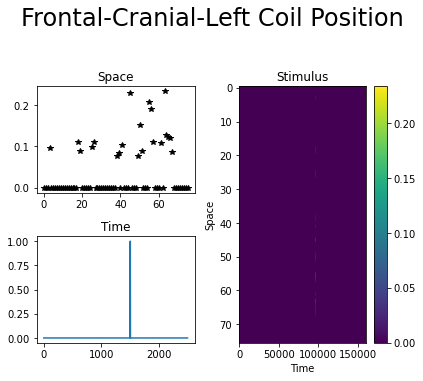

In [5]:
# Choose stimulus shape from "SinglePulse", "rTMS", "iTBS"
stim = get_stimulus(weighting, white_matter, duration=2.5e3, type="SinglePulse")
plot_stimulus(stim, fig8_coil.pos_list[ind], type="rTMS")

### Define monitors

In [13]:
# Choose monitor/s from "raw", "tavg", "savg", "eeg" and "bold"
monitors_needed = ["tavg", "eeg"] 
all_mons = get_monitors(monitors_needed)

### Define the simulator

In [14]:
#resting state simulation
rs_sim = simulator.Simulator(model=neuron_model,
                          connectivity=white_matter,
                          coupling=white_matter_coupling,
                          integrator=heunint,
#                           surface=default_cortex
                          monitors=all_mons,
                         )
rs_sim.configure()

   INFO  Projection configured gain shape (65, 76)


,value
Type,Simulator
conduction_speed,3.0
connectivity,Connectivity gid: bb8c8f00-c7ae-489b-88c4-33130d61a9f2
coupling,Difference gid: 2c4393de-674f-4b7e-b507-dec039b38422
gid,UUID('bac4ae6f-eee2-4352-b2af-e4b13ce7a909')
initial_conditions,None
integrator,HeunStochastic gid: 06f5dbac-3436-4141-9f08-7d70295522d4
model,Generic2dOscillator gid: 7b274c32-5e01-4d85-a34b-b6a6fcc61e6e
monitors,"[, ]"
simulation_length,1000.0


In [15]:
# tms simulation
tms_sim = simulator.Simulator(model=neuron_model,
                          connectivity=white_matter,
                          coupling=white_matter_coupling,
                          integrator=heunint,
#                           surface=default_cortex,   
                          monitors=all_mons,
                          stimulus=stim, 
                         )
tms_sim.configure()

   INFO  Projection configured gain shape (65, 76)


,value
Type,Simulator
conduction_speed,3.0
connectivity,Connectivity gid: bb8c8f00-c7ae-489b-88c4-33130d61a9f2
coupling,Difference gid: 2c4393de-674f-4b7e-b507-dec039b38422
gid,UUID('e50bcef6-dcff-4e7b-a93d-5a5fff33c2a2')
initial_conditions,None
integrator,HeunStochastic gid: 06f5dbac-3436-4141-9f08-7d70295522d4
model,Generic2dOscillator gid: 7b274c32-5e01-4d85-a34b-b6a6fcc61e6e
monitors,"[, ]"
simulation_length,1000.0


### Run simulation

In [16]:
duration = 2.5e3 
rs_data = run_simulation(rs_sim, duration, monitors_needed)
tms_data = run_simulation(tms_sim, duration, monitors_needed)

The simulation took 38.1s to run
The simulation took 40.1s to run


### Visualisation

Resting state simulation:


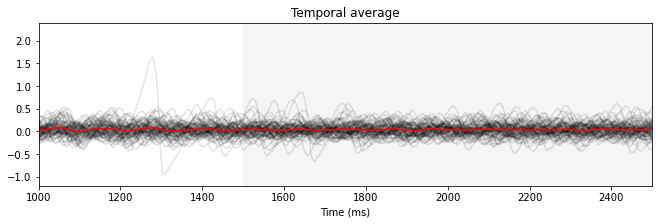

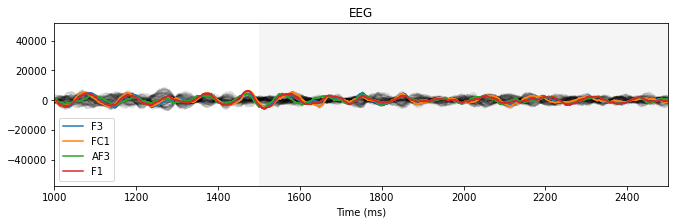

TMS simulation:


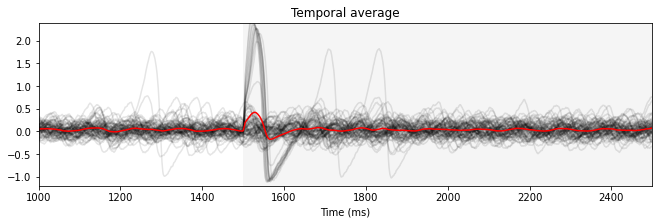

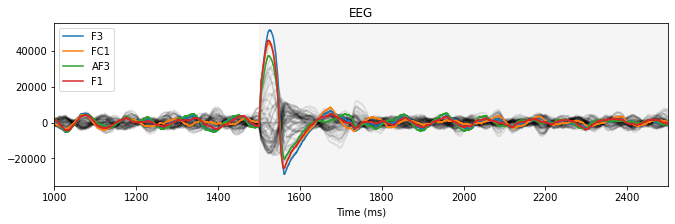

In [20]:
EOI=[3, 41, 42, 58] # electrodes of interest
EOI_labels=all_mons[1].sensors.labels[EOI]

print('Resting state simulation:')
plot_monitor_data(rs_data, monitors_needed, duration, EOI, EOI_labels)

print('TMS simulation:')
plot_monitor_data(tms_data, monitors_needed, duration, EOI, EOI_labels)

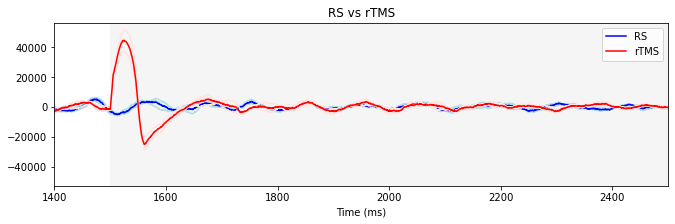

In [21]:
# RS vs TMS
plot_eeg_comparison(rs_data['eeg'], tms_data['eeg'], duration, 'RS vs rTMS', ['RS', 'rTMS'])

### Extract TEPs and visualise them

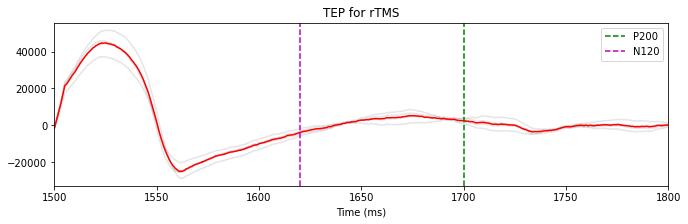

In [22]:
plot_TEP(tms_data['eeg'], stimulus='rTMS')

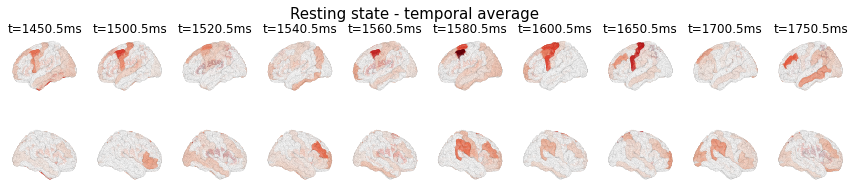

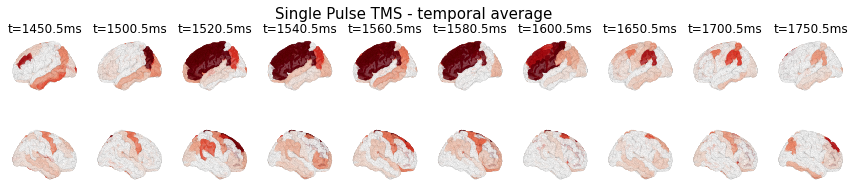

In [27]:
time_stamps = [1450, 1500, 1520, 1540, 1560, 1580, 1600, 1650, 1700, 1750]
plot_activity_on_brain(default_cortex.vertices,default_cortex.triangles,default_cortex.region_mapping, rs_data['tavg'], time_stamps, "Resting state - temporal average")
plot_activity_on_brain(default_cortex.vertices,default_cortex.triangles,default_cortex.region_mapping, tms_data['tavg'], time_stamps, "Single Pulse TMS - temporal average")